In [7]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('quantum_cartpole')

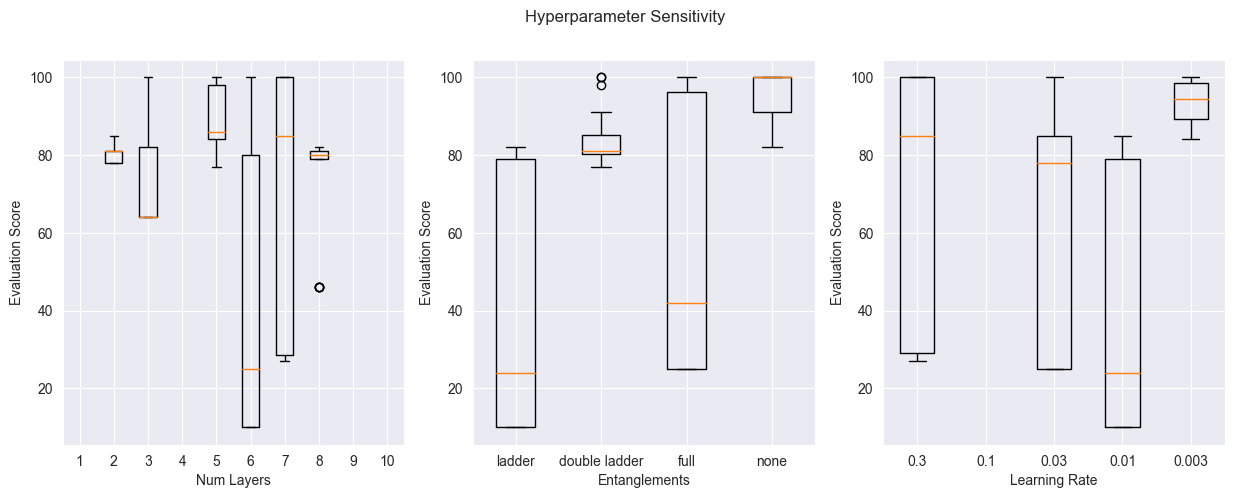

In [8]:
# Group episodes by trial, episode, and hyperparameters, get average evaluation score for each episode in the trial
# grouped_episodes = episodes.groupby(['trial_id', 'episode', 'layers', 'entanglements', 'learning_rate']).agg(
#     {'evaluation_score': 'mean'}).reset_index()

# Get the maximum evaluation score for each episode
best_eval_score = episodes.groupby('episode')['evaluation_score'].max().reset_index()

# Filter the episodes to only include the best evaluation score for each episode
best_episodes = pd.merge(best_eval_score, episodes, on=['episode', 'evaluation_score'], how='inner')

# Create box plots for each hyperparameter configuration
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Hyperparameter Sensitivity')

axs[0].boxplot(
    [best_episodes[best_episodes['layers'] == l]['evaluation_score'] for l in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
axs[0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
axs[0].set_xlabel('Num Layers')
axs[0].set_ylabel('Evaluation Score')

axs[1].boxplot([best_episodes[best_episodes['entanglements'] == n]['evaluation_score'] for n in
                ['ladder', 'double ladder', 'full', 'none']])
axs[1].set_xticklabels(['ladder', 'double ladder', 'full', 'none'])
axs[1].set_xlabel('Entanglements')
axs[1].set_ylabel('Evaluation Score')

axs[2].boxplot([best_episodes[best_episodes['learning_rate'] == lr]['evaluation_score'] for lr in
                [0.3, 0.1, 0.03, 0.01, 0.003]])
axs[2].set_xticklabels([0.3, 0.1, 0.03, 0.01, 0.003])
axs[2].set_xlabel('Learning Rate')
axs[2].set_ylabel('Evaluation Score')

plt.show()

Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Nodes')

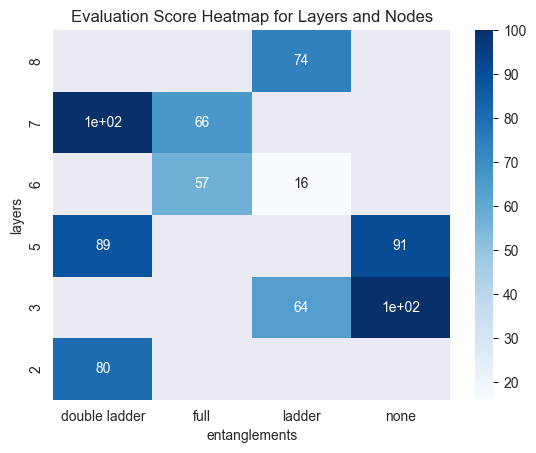

In [9]:
# Create a pivot table to aggregate the evaluation score by layers and neurons
layers_nodes = best_episodes.pivot_table(index='layers', columns='entanglements', values='evaluation_score',
                                         aggfunc='mean')

# Create a heatmap for layers and neurons
sns.heatmap(layers_nodes, annot=True, cmap='Blues').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Nodes')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Learning Rate')

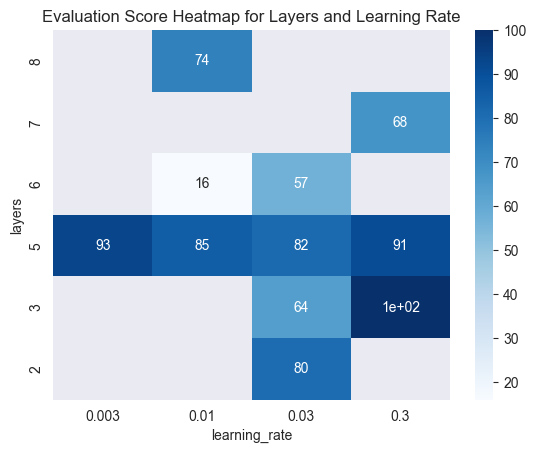

In [10]:
# Create a pivot table to aggregate the evaluation score by layers and learning rate
layers_lr = best_episodes.pivot_table(index='layers', columns='learning_rate', values='evaluation_score',
                                      aggfunc='mean')

# Create a heatmap for layers and learning rate
sns.heatmap(layers_lr, annot=True, cmap='Blues').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Learning Rate')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Learning Rate and Nodes')

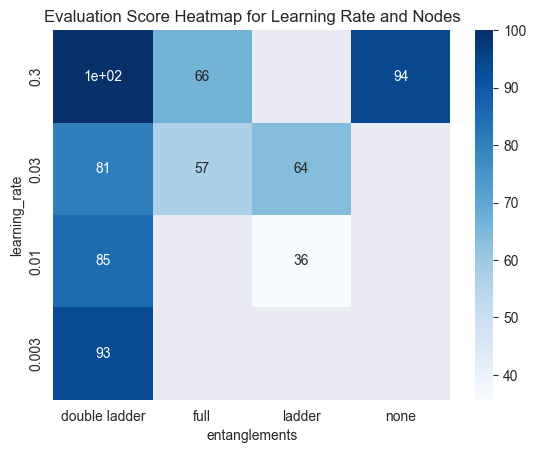

In [11]:
# Create a pivot table to aggregate the evaluation score by learning rate and nodes
lr_nodes = best_episodes.pivot_table(index='learning_rate', columns='entanglements', values='evaluation_score',
                                     aggfunc='mean')

# Create a heatmap for learning rate and nodes
sns.heatmap(lr_nodes, annot=True, cmap='Blues').invert_yaxis()
plt.title('Evaluation Score Heatmap for Learning Rate and Nodes')
